In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread# for reading image
# Technically not necessary in newest versions of jupyter
%matplotlib inline

**ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/.**

In [2]:
import os

In [3]:
my_data_dir = 'C:\\Users\\elham\\Downloads\\cell_images\\cell_images'

In [4]:
# we have  to folders train and test
os.listdir(my_data_dir) 

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [6]:
test_path

'C:\\Users\\elham\\Downloads\\cell_images\\cell_images\\test\\'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_img= imread(para_cell)

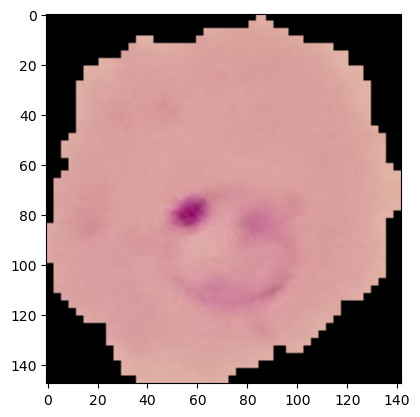

In [12]:
plt.imshow(para_img)

In [13]:
para_img.shape

(148, 142, 3)

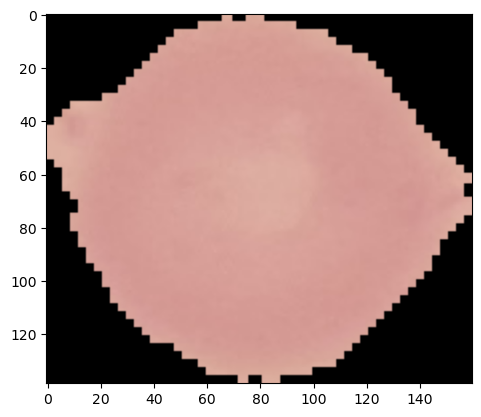

In [14]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Let's check how many images there are.**

In [15]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [16]:
len(os.listdir(train_path+'\\uninfected'))

12480

**Let's find out the average dimensions of these images.**

In [17]:
unifected_cell.shape

(139, 160, 3)

In [58]:
para_img.shape

(148, 142, 3)

In [21]:
#we have images with diffrent dimantion so we have to have same dimantion  for cnn
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\elham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\elham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


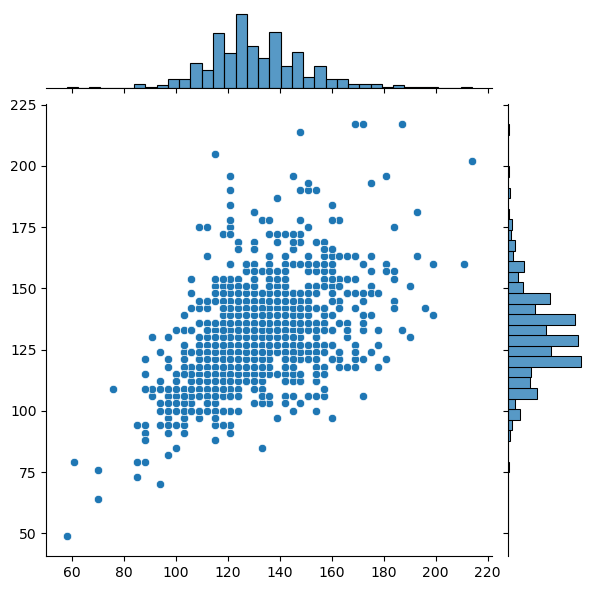

In [27]:
sns.jointplot(x = dim1, y = dim2)

In [24]:
np.mean(dim1)

130.92538461538462

In [25]:
np.mean(dim2)

130.75

In [26]:
image_shape = (130,130,3)# we have to feed cnn images of this shape

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. 

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max 
                               height_shift_range=0.10, # Shift the pic height by a max 
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

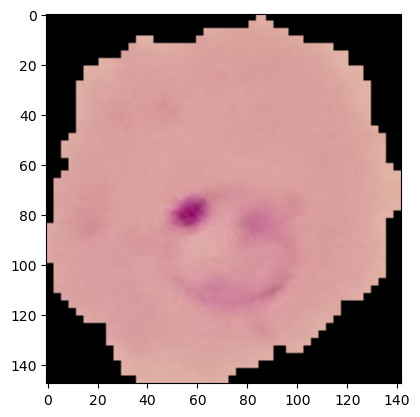

In [32]:
plt.imshow(para_img)

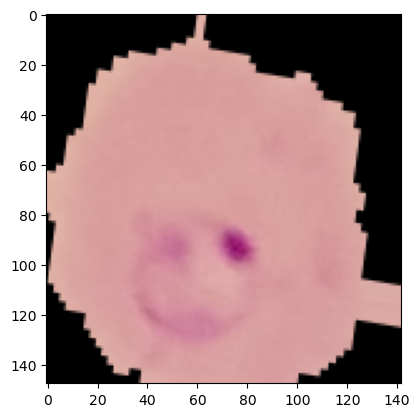

In [33]:
plt.imshow(image_gen.random_transform(para_img))

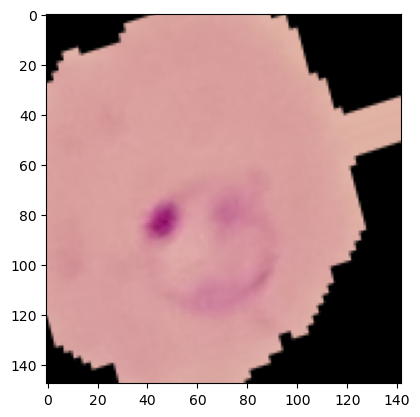

In [36]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, we must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.



In [37]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [38]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [40]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

## Early Stopping

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Training the Model

In [44]:
batch_size = 16

In [45]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [46]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [47]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20


1560/1560 [==============================] - 1221s 781ms/step - loss: 0.3071 - accuracy: 0.8761 - val_loss: 0.2505 - val_accuracy: 0.9131
Epoch 2/20
1560/1560 [==============================] - 416s 267ms/step - loss: 0.1742 - accuracy: 0.9461 - val_loss: 0.1730 - val_accuracy: 0.9442
Epoch 3/20
1560/1560 [==============================] - 397s 254ms/step - loss: 0.1658 - accuracy: 0.9479 - val_loss: 0.1634 - val_accuracy: 0.9473
Epoch 4/20
1560/1560 [==============================] - 431s 276ms/step - loss: 0.1602 - accuracy: 0.9510 - val_loss: 0.1572 - val_accuracy: 0.9442
Epoch 5/20
1560/1560 [==============================] - 425s 272ms/step - loss: 0.1591 - accuracy: 0.9499 - val_loss: 0.1613 - val_accuracy: 0.9454
Epoch 6/20
1560/1560 [==============================] - 453s 290ms/step - loss: 0.1556 - accuracy: 0.9509 - val_loss: 0.1544 - val_accuracy: 0.9508
Epoch 7/20
1560/1560 [==============================] - 397s 254ms/step - loss: 0.1542 - accuracy: 0.9514 - v

# Evaluating the Model

In [50]:
losses = pd.DataFrame(model.history.history)

<Axes: >

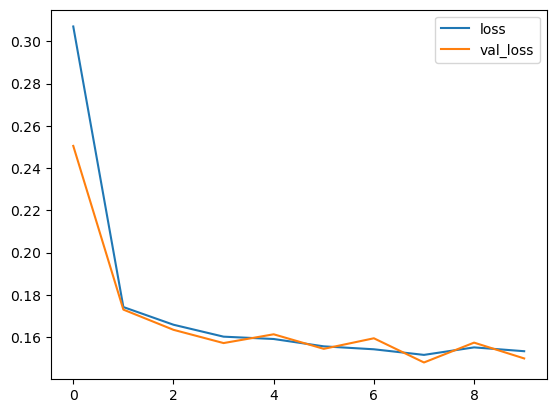

In [51]:
losses[['loss','val_loss']].plot()

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
model.evaluate_generator(test_image_gen)

[0.14520910382270813, 0.9538461565971375]

In [54]:
from tensorflow.keras.preprocessing import image

In [55]:
pred_probabilities = model.predict_generator(test_image_gen)

In [56]:
pred_probabilities

array([[9.9887617e-04],
       [4.8156295e-04],
       [8.0183670e-03],
       ...,
       [9.1679978e-01],
       [9.6540642e-01],
       [9.7096658e-01]], dtype=float32)

In [57]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
predictions = pred_probabilities > 0.5

In [59]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.95      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [62]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1228,   72],
       [  53, 1247]], dtype=int64)

# Predicting on an Image

In [63]:
# Your file path will be different!
para_cell

'C:\\Users\\elham\\Downloads\\cell_images\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [64]:
my_image = image.load_img(para_cell,target_size=image_shape)

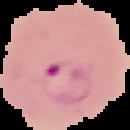

In [65]:
my_image

In [66]:
type(my_image)

PIL.Image.Image

In [67]:
my_image = image.img_to_array(my_image)

In [68]:
type(my_image)

numpy.ndarray

In [69]:
my_image.shape

(130, 130, 3)

In [70]:
my_image = np.expand_dims(my_image, axis=0)

In [71]:
my_image.shape

(1, 130, 130, 3)

In [72]:
model.predict(my_image)

1/1 [==============================] - 0s 273ms/step


array([[0.]], dtype=float32)

In [73]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [74]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}